# Achraf Safsafi
# DSC 680
# Fake News Detection Using Machine Learning Methods

## Import all libraries needed for the project

In [1]:
import pandas as pd
from pycaret.nlp import *
import matplotlib.pyplot as plt

# Data Understanding

In [2]:
# import and read data
data = 'news.csv'
df = pd.read_csv(data)
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# data frame shape
df.shape

(6335, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
#columns needed
df = df[['text','label']]
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


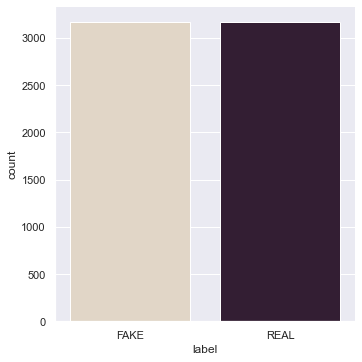

In [6]:
#class distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.catplot(x="label", kind="count", palette="ch:s=.25", data=df)

In [7]:
corups = " ".join(t for t in df.text)
print ("There are {} words in the combination of all articles.".format(len(corups)))


There are 29826765 words in the combination of all articles.


str

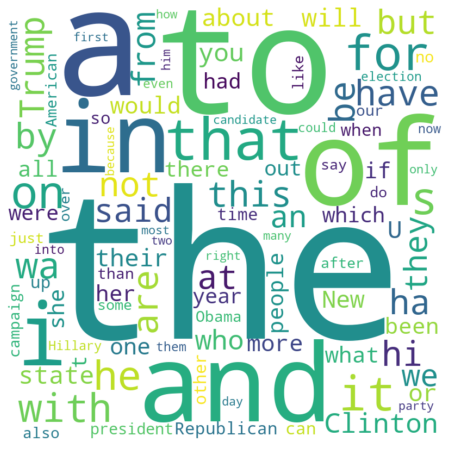

In [8]:
#Word cloud before preprocessing
# combine all articles into one big text and create a big fat cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', max_words=100,
                      collocations= False,stopwords =[]).generate(corups)

# Display the generated image:
sns.set(rc = {'figure.figsize':(15,8)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Words')

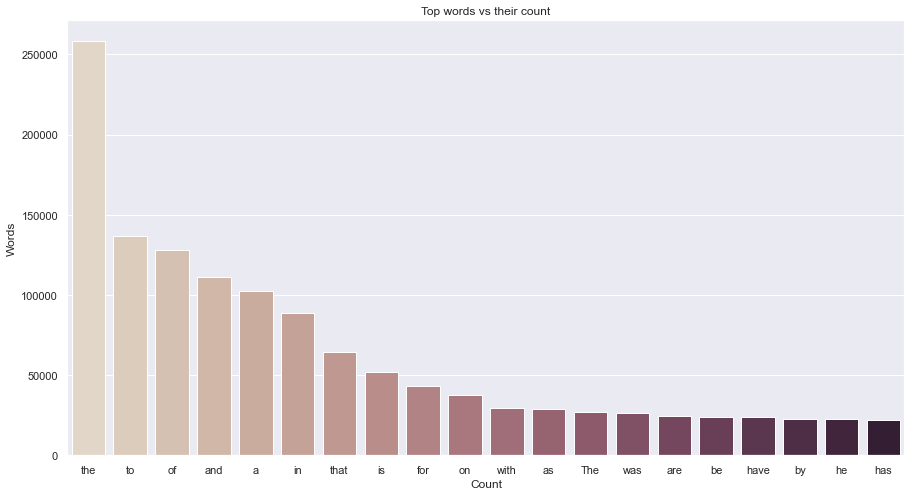

In [9]:
import collections
import warnings
warnings.filterwarnings("ignore")

corups1 = [word for word in corups.split()]# if word not in stopwords]
counted_words = collections.Counter(corups1)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
#colors = cm.rainbow(np.linspace(0, 1, 10))
#rcParams['figure.figsize'] = 20, 10

sns.barplot(words,counts,palette="ch:s=.25")

plt.title('Top words vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
#plt.barh(words, counts, color="b")

# Data Preparation

In [10]:
# Label Encoding
df['label'] = df['label'].map({'FAKE':1, 'REAL':0})
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,U.S. Secretary of State John F. Kerry said Mon...,0
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,It's primary day in New York and front-runners...,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6335 non-null   object
 1   label   6335 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.1+ KB


In [12]:
#text pre-processing  
se = setup(data = df, target = 'text', log_experiment = True, experiment_name = 'fake_news',
           session_id = 123)

Description,Value
session_id,123
Documents,6335
Vocab Size,39885
Custom Stopwords,False


In [13]:
# Create a Topic Model
lda = create_model('lda', multi_core = True)


In [14]:
lda

In [15]:
# Intrinsic Evaluation using Coherence Value
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

In [16]:
lda1 = create_model('lda', num_topics = 32, multi_core = True)

In [17]:
#Assign a Model
lda_results = assign_model(lda1)
lda_results.head()

,text,label,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,...,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29,Topic_30,Topic_31,Dominant_Topic,Perc_Dominant_Topic
0,writer focus election go word unprecedented th...,1,0.000074,0.272583,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,...,0.000074,0.000074,0.000074,0.149996,0.000074,0.000074,0.003525,0.000074,Topic 21,0.48
1,reddit_stumbleupon_print_delicious pocket_tumb...,1,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,...,0.000201,0.000201,0.000201,0.223115,0.000201,0.000201,0.000201,0.000201,Topic 21,0.69
2,say later week criticism top american official...,0,0.053661,0.000272,0.000272,0.000272,0.000272,0.137577,0.000272,0.000272,...,0.000272,0.000272,0.000272,0.163300,0.000272,0.000272,0.000272,0.335322,Topic 31,0.34
3,kaydeeke lesson tonight loss time start listen...,1,0.000230,0.143022,0.000230,0.000230,0.000230,0.000230,0.000230,0.054799,...,0.000230,0.000230,0.000230,0.038123,0.000230,0.000230,0.000230,0.000230,Topic 22,0.53
4,primary day lead poll trump vow win republican...,0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,...,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,Topic 22,0.93


In [18]:
plot_model(lda1, plot = 'topic_distribution')

In [19]:
evaluate_model(lda1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [20]:
plot_model()

In [21]:
plot_model(plot ='bigram')

In [22]:
plot_model(plot = 'trigram')

In [23]:
cl_corups = " ".join(t for t in lda_results.text)
print ("There are {} words in the combination of all articles.".format(len(cl_corups)))

There are 13635565 words in the combination of all articles.


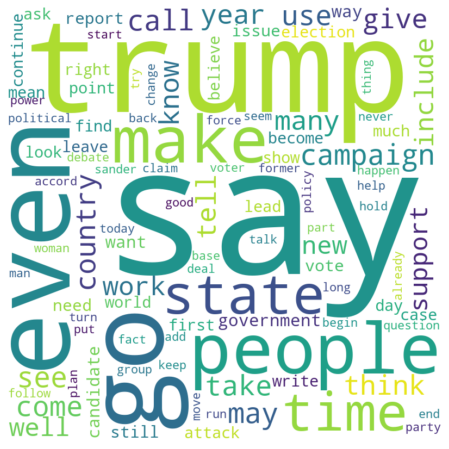

In [24]:
#Word cloud after preprocessing
# combine all articles into one big text and create a big fat cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', max_words=100).generate(cl_corups)

# Display the generated image:
sns.set(rc = {'figure.figsize':(15,8)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Words')

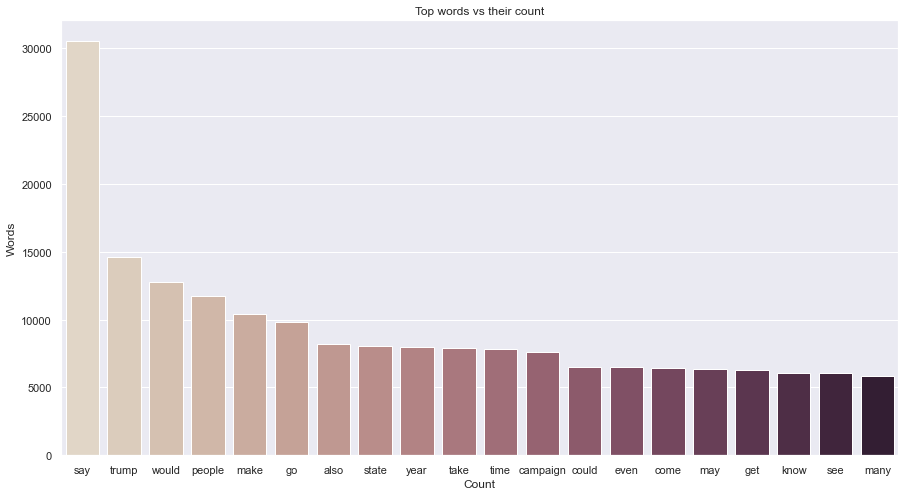

In [25]:
cl_corups1 = [word for word in cl_corups.split()]# if word not in stopwords]
counted_words = collections.Counter(cl_corups1)

words1 = []
counts1 = []
for letter, count in counted_words.most_common(20):
    words1.append(letter)
    counts1.append(count)

sns.barplot(words1,counts1,palette="ch:s=.25")

plt.title('Top words vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
#plt.barh(words, counts, color="b")

In [26]:
#Feature Extraction

In [27]:
lda_results.drop(['text','Dominant_Topic','Perc_Dominant_Topic'],axis=1,inplace=True)
lda_results.head()

,label,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,...,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29,Topic_30,Topic_31
0,1,0.000074,0.272583,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,...,0.000074,0.000074,0.000074,0.000074,0.000074,0.149996,0.000074,0.000074,0.003525,0.000074
1,1,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,...,0.079072,0.000201,0.000201,0.000201,0.000201,0.223115,0.000201,0.000201,0.000201,0.000201
2,0,0.053661,0.000272,0.000272,0.000272,0.000272,0.137577,0.000272,0.000272,0.000272,...,0.000272,0.000272,0.000272,0.000272,0.000272,0.163300,0.000272,0.000272,0.000272,0.335322
3,1,0.000230,0.143022,0.000230,0.000230,0.000230,0.000230,0.000230,0.054799,0.000230,...,0.530999,0.000230,0.000230,0.000230,0.000230,0.038123,0.000230,0.000230,0.000230,0.000230
4,0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,...,0.934344,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289


# Modeling

In [28]:
#setup Classification module
from pycaret.classification import *
clf = setup(data =lda_results, target = 'label', 
             transformation = True, 
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            session_id=123,log_experiment = True, experiment_name = 'fake_news') 

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6335, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
#Comparing All Models

top3= compare_models(n_select =3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8491,0.9253,0.8606,0.8414,0.8507,0.6982,0.6988,0.3440
xgboost,Extreme Gradient Boosting,0.8446,0.9216,0.8520,0.8394,0.8455,0.6892,0.6896,1.9220
gbc,Gradient Boosting Classifier,0.8437,0.9200,0.8489,0.8404,0.8444,0.6874,0.6878,1.8220
rf,Random Forest Classifier,0.8417,0.9171,0.8489,0.8369,0.8427,0.6833,0.6837,0.9010
et,Extra Trees Classifier,0.8385,0.9171,0.8543,0.8282,0.8409,0.6770,0.6775,0.4220
ada,Ada Boost Classifier,0.8166,0.9013,0.8114,0.8200,0.8156,0.6333,0.6335,0.4370
knn,K Neighbors Classifier,0.7912,0.8622,0.7600,0.8107,0.7845,0.5823,0.5836,0.2820
ridge,Ridge Classifier,0.7763,0.0000,0.7731,0.7783,0.7754,0.5525,0.5529,0.0210
lda,Linear Discriminant Analysis,0.7763,0.8611,0.7731,0.7783,0.7754,0.5525,0.5529,0.0500
lr,Logistic Regression,0.7742,0.8613,0.7690,0.7775,0.7730,0.5485,0.5488,2.1360


In [30]:
# Create a Model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8108,0.8937,0.8153,0.8080,0.8117,0.6216,0.6216
1,0.8806,0.9403,0.8919,0.8722,0.8820,0.7613,0.7615
2,0.8806,0.9504,0.9054,0.8627,0.8835,0.7613,0.7622
3,0.8671,0.9304,0.9144,0.8354,0.8731,0.7342,0.7375
4,0.8284,0.9081,0.8507,0.8139,0.8319,0.6569,0.6576
5,0.8420,0.9297,0.8371,0.8447,0.8409,0.6840,0.6840
6,0.8623,0.9208,0.8552,0.8670,0.8610,0.7246,0.7247
7,0.8442,0.9218,0.8333,0.8525,0.8428,0.6885,0.6887
8,0.8397,0.9317,0.8559,0.8297,0.8426,0.6794,0.6798
9,0.8352,0.9264,0.8468,0.8282,0.8374,0.6704,0.6706


In [31]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8153,0.8887,0.8018,0.8241,0.8128,0.6306,0.6309
1,0.8694,0.9370,0.8694,0.8694,0.8694,0.7387,0.7387
2,0.8851,0.9498,0.9099,0.8670,0.8879,0.7703,0.7712
3,0.8626,0.9300,0.8874,0.8455,0.8659,0.7252,0.7261
4,0.8217,0.9065,0.8145,0.8257,0.8200,0.6433,0.6434
5,0.8284,0.9238,0.8145,0.8372,0.8257,0.6569,0.6571
6,0.8488,0.9163,0.8552,0.8438,0.8494,0.6975,0.6976
7,0.8194,0.9129,0.8288,0.8142,0.8214,0.6388,0.6389
8,0.8488,0.9283,0.8739,0.8326,0.8527,0.6975,0.6983
9,0.8465,0.9228,0.8649,0.8348,0.8496,0.6930,0.6934


In [32]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8131,0.8932,0.7973,0.8233,0.8101,0.6261,0.6264
1,0.8604,0.9329,0.8649,0.8571,0.8610,0.7207,0.7207
2,0.8649,0.9353,0.8739,0.8584,0.8661,0.7297,0.7298
3,0.8468,0.9265,0.8919,0.8182,0.8534,0.6937,0.6965
4,0.8217,0.8967,0.8416,0.8087,0.8248,0.6434,0.6439
5,0.8533,0.9263,0.8462,0.8578,0.8519,0.7065,0.7066
6,0.8330,0.9132,0.8190,0.8419,0.8303,0.6659,0.6661
7,0.8420,0.9135,0.8378,0.8455,0.8416,0.6840,0.6840
8,0.8397,0.9279,0.8514,0.8326,0.8419,0.6794,0.6796
9,0.8623,0.9347,0.8649,0.8610,0.8629,0.7246,0.7246


In [44]:
#Blending
# blend individual models
blend_soft = blend_models(estimator_list =top3, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8266,0.8976,0.8288,0.8251,0.8270,0.6532,0.6532
1,0.8761,0.9407,0.8919,0.8646,0.8780,0.7523,0.7526
2,0.8829,0.9512,0.9054,0.8664,0.8855,0.7658,0.7665
3,0.8649,0.9343,0.8964,0.8432,0.8690,0.7297,0.7312
4,0.8307,0.9085,0.8416,0.8230,0.8322,0.6614,0.6616
5,0.8442,0.9308,0.8462,0.8423,0.8442,0.6885,0.6885
6,0.8668,0.9226,0.8688,0.8649,0.8668,0.7336,0.7336
7,0.8397,0.9208,0.8514,0.8326,0.8419,0.6794,0.6796
8,0.8488,0.9340,0.8649,0.8384,0.8514,0.6975,0.6978
9,0.8488,0.9326,0.8604,0.8414,0.8508,0.6975,0.6977


In [45]:
blend_hard = blend_models(estimator_list =top3, method = 'hard')
#[lightgbm,xgboost,gbc,et,rf]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8198,0.0000,0.8198,0.8198,0.8198,0.6396,0.6396
1,0.8761,0.0000,0.8919,0.8646,0.8780,0.7523,0.7526
2,0.8896,0.0000,0.9144,0.8712,0.8923,0.7793,0.7802
3,0.8649,0.0000,0.9099,0.8347,0.8707,0.7297,0.7327
4,0.8330,0.0000,0.8552,0.8182,0.8363,0.6659,0.6666
5,0.8420,0.0000,0.8462,0.8386,0.8423,0.6840,0.6840
6,0.8623,0.0000,0.8597,0.8636,0.8617,0.7246,0.7246
7,0.8442,0.0000,0.8468,0.8430,0.8449,0.6885,0.6885
8,0.8510,0.0000,0.8649,0.8421,0.8533,0.7020,0.7023
9,0.8442,0.0000,0.8604,0.8341,0.8470,0.6885,0.6888


In [46]:
#Stacking
#Level-0 Models (Base-Models):
stack_0 = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.8986,0.8243,0.8394,0.8318,0.6667,0.6668
1,0.8739,0.9359,0.8919,0.8609,0.8761,0.7477,0.7482
2,0.8874,0.9494,0.8874,0.8874,0.8874,0.7748,0.7748
3,0.8761,0.9342,0.9144,0.8494,0.8807,0.7523,0.7545
4,0.8194,0.8989,0.8235,0.8161,0.8198,0.6388,0.6389
5,0.8510,0.9311,0.8507,0.8507,0.8507,0.7020,0.7020
6,0.8691,0.9168,0.8688,0.8688,0.8688,0.7381,0.7381
7,0.8442,0.9146,0.8423,0.8462,0.8442,0.6885,0.6885
8,0.8533,0.9338,0.8739,0.8398,0.8565,0.7065,0.7071
9,0.8533,0.9322,0.8514,0.8552,0.8533,0.7065,0.7066
